In [62]:
%matplotlib inline
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
plt.style.use({'figure.figsize':(12, 8)})
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Part 1: Data Exploration [15 Points]

For data exploration, I would start with examining the overall characteristics of the data.

In [63]:
# Read the csv files into pandas dataframe
train_ml_df = pd.read_csv('../data/trainML.csv')
test_ml_df = pd.read_csv('../data/testML.csv')

In [64]:
print(train_ml_df.shape)

(3808, 61)


The trainML has 3808 rows and 61 columns

In [65]:
train_ml_df.head()

,gender,match,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,met_o,age,field,race,imprace,imprelig,from,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,attr3_1,sinc3_1,fun3_1,intel3_1,attr,sinc,intel,fun,met,iid,pid,shar1_1
0,0,0,0,29.0,3.0,20.0,25.0,15.0,15.0,53.0,20.0,7.0,6.0,6.0,7.0,2.0,23.0,social work,2.0,10.0,9.0,Florida,1.0,3.0,1.0,social worker,9.0,2.0,1.0,10.0,10.0,5.0,5.0,2.0,1.0,7.0,6.0,8.0,8.0,7.0,6.0,9.0,10.0,4.0,17.0,18.0,18.0,15.0,17.0,10.0,10.0,9.0,8.0,2.0,6.0,2.0,3.0,2.0,355,150,15.0
1,0,0,0,22.0,6.0,20.0,15.0,20.0,20.0,5.0,10.0,8.0,8.0,7.0,7.0,2.0,23.0,social work,2.0,10.0,9.0,Florida,1.0,3.0,1.0,social worker,9.0,2.0,1.0,10.0,10.0,5.0,5.0,2.0,1.0,7.0,6.0,8.0,8.0,7.0,6.0,9.0,10.0,4.0,17.0,18.0,18.0,15.0,17.0,10.0,10.0,9.0,8.0,3.0,9.0,9.0,7.0,2.0,355,214,15.0
2,0,0,0,27.0,1.0,21.0,17.0,22.0,20.0,8.0,13.0,6.0,4.0,5.0,6.0,2.0,23.0,social work,2.0,10.0,9.0,Florida,1.0,3.0,1.0,social worker,9.0,2.0,1.0,10.0,10.0,5.0,5.0,2.0,1.0,7.0,6.0,8.0,8.0,7.0,6.0,9.0,10.0,4.0,17.0,18.0,18.0,15.0,17.0,10.0,10.0,9.0,8.0,3.0,7.0,5.0,3.0,NaN,355,515,15.0
3,0,1,1,28.0,2.0,50.0,10.0,30.0,10.0,0.0,0.0,7.0,5.0,5.0,7.0,2.0,23.0,social work,2.0,10.0,9.0,Florida,1.0,3.0,1.0,social worker,9.0,2.0,1.0,10.0,10.0,5.0,5.0,2.0,1.0,7.0,6.0,8.0,8.0,7.0,6.0,9.0,10.0,4.0,17.0,18.0,18.0,15.0,17.0,10.0,10.0,9.0,8.0,5.0,10.0,8.0,5.0,2.0,355,528,15.0
4,0,1,1,26.0,2.0,25.0,10.0,20.0,20.0,15.0,10.0,8.0,6.0,7.0,7.0,2.0,23.0,social work,2.0,10.0,9.0,Florida,1.0,3.0,1.0,social worker,9.0,2.0,1.0,10.0,10.0,5.0,5.0,2.0,1.0,7.0,6.0,8.0,8.0,7.0,6.0,9.0,10.0,4.0,17.0,18.0,18.0,15.0,17.0,10.0,10.0,9.0,8.0,4.0,7.0,9.0,9.0,2.0,355,291,15.0


In [66]:
# Check the data type and number of entries for each feature
train_ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 61 columns):
gender      3808 non-null int64
match       3808 non-null int64
samerace    3808 non-null int64
age_o       3741 non-null float64
race_o      3750 non-null float64
pf_o_att    3750 non-null float64
pf_o_sin    3750 non-null float64
pf_o_int    3750 non-null float64
pf_o_fun    3741 non-null float64
pf_o_amb    3732 non-null float64
pf_o_sha    3732 non-null float64
attr_o      3711 non-null float64
sinc_o      3670 non-null float64
intel_o     3666 non-null float64
fun_o       3647 non-null float64
met_o       3640 non-null float64
age         3741 non-null float64
field       3750 non-null object
race        3750 non-null float64
imprace     3750 non-null float64
imprelig    3750 non-null float64
from        3750 non-null object
goal        3750 non-null float64
date        3750 non-null float64
go_out      3750 non-null float64
career      3740 non-null object
career_c    3740 n

In [67]:
# Check columns with data type as objects
train_ml_df.dtypes[train_ml_df.dtypes==object].index

Index(['field', 'from', 'career'], dtype='object')

In [68]:
# Get an overview of the numerical features
train_ml_df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,3808.0,0.500000,0.500066,0.0,0.0,0.5,1.0,1.0
match,3808.0,0.164916,0.371153,0.0,0.0,0.0,0.0,1.0
samerace,3808.0,0.344013,0.475108,0.0,0.0,0.0,1.0,1.0
age_o,3741.0,26.672815,3.847338,18.0,24.0,26.0,29.0,55.0
race_o,3750.0,2.885600,1.287227,1.0,2.0,2.0,4.0,6.0
pf_o_att,3750.0,22.492333,11.968602,0.0,15.0,20.0,25.0,80.0
pf_o_sin,3750.0,17.740259,7.567328,0.0,15.0,19.0,20.0,60.0
pf_o_int,3750.0,20.402589,7.267267,0.0,16.0,20.0,25.0,50.0
pf_o_fun,3741.0,17.191165,6.083094,0.0,14.0,18.0,20.0,50.0
pf_o_amb,3732.0,10.723025,6.288042,0.0,5.0,10.0,15.0,53.0


#### Visualizing Data

I will use pie charts and histograms for data visualization

In [69]:
analisis_df = train_ml_df.copy()

Male      1904
Female    1904
Name: gender, dtype: int64


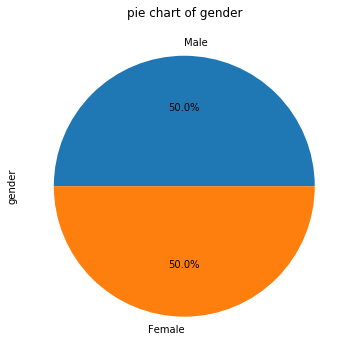

In [70]:
analisis_df['gender'] = analisis_df['gender'].map({0:'Female', 1:'Male'})
series = analisis_df['gender'].value_counts()
print(series)
series.plot('pie', autopct='%1.1f%%', figsize=(8,6), title='pie chart of gender')

We can tell that the number of male and female is exactly the same

Text(0, 0.5, 'count')

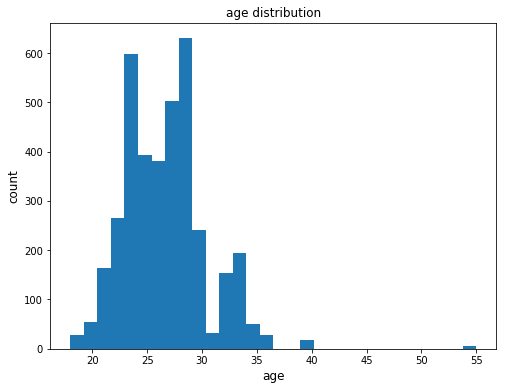

In [71]:
ax = analisis_df['age'].plot(kind='hist', bins=30, figsize=(8, 6), title='age distribution',)
ax.set_xlabel('age',fontsize=12)
ax.set_ylabel('count', fontsize=12)

Most people are between 20 and 30 years old, with a few outliers like those around 54. But overall the age distrubition is obivious.

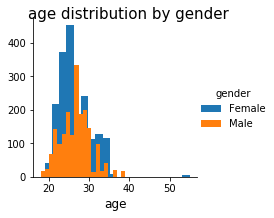

In [72]:
# Plot the age distribution by gender
g = sns.FacetGrid(analisis_df, hue='gender', )
g.map(plt.hist, 'age',  bins=20)
g.set_xlabels('age', fontsize=12)
g.fig.suptitle('age distribution by gender', fontsize=15)
g.add_legend()

We can conclude that the age distribution of female is lower than the age distribution of male.

age_diff                         
            mean median   min   max count
gender                                   
Female -0.286336   -1.0 -17.0  32.0  1837
Male    0.286336    1.0 -32.0  17.0  1837

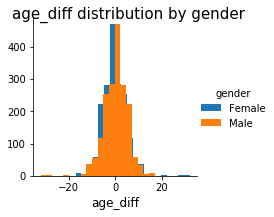

In [73]:
# Plot the age difference
analisis_df['age_diff'] = analisis_df.apply(lambda df:df['age']-df['age_o'], axis=1)
g = sns.FacetGrid(analisis_df, hue='gender', )
g.map(plt.hist, 'age_diff',  bins=20)
g.set_xlabels('age_diff', fontsize=12)
g.fig.suptitle('age_diff distribution by gender', fontsize=15)
g.add_legend()

analisis_df[['gender', 'age_diff']].groupby('gender').agg(['mean', 'median', 'min', 'max', 'count'])

We can tell that in a date, it's more commonly that the male is older than the female

Text(0, 0.5, 'count')

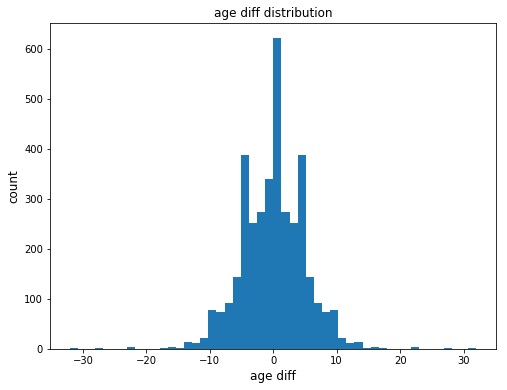

In [74]:
# Plot the age difference distribution
analisis_df['age_diff'] = analisis_df.apply(lambda df:df['age']-df['age_o'], axis=1)
ax = analisis_df['age_diff'].plot(kind='hist', bins=50, figsize=(8, 6), title='age diff distribution',)
ax.set_xlabel('age diff',fontsize=12)
ax.set_ylabel('count', fontsize=12)

For a large proportion of dates, the age differences are rather small

White       1950
Asian        951
Hispanic     384
Other        300
Black        165
NaN           58
Name: race, dtype: int64


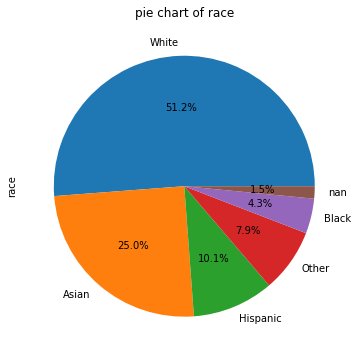

In [75]:
# Plot the race proportion
analisis_df['race'] = analisis_df.race.map({1: 'Black', 2: 'White', 3: 'Hispanic', 
                          4: 'Asian', 6: 'Other'})
series = analisis_df['race'].value_counts(dropna=False)
print(series)
series.plot('pie', autopct='%1.1f%%', figsize=(8,6), title='pie chart of race')

More than half of the people are white, and the second largest race is Asian.

In [76]:
series.index.map({0:'F', 1:'M'})

Float64Index([nan, nan, nan, nan, nan, nan], dtype='float64')

match
Match is unsuccessful    2100
Matching success          398
dtype: int64


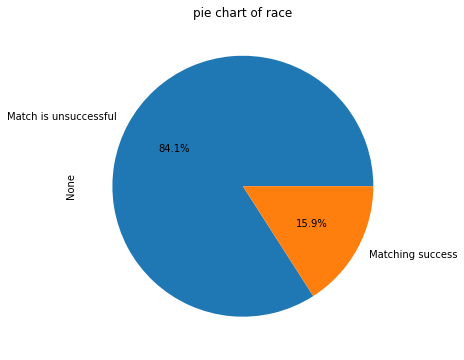

In [77]:
# Use the samerace feature to see if the date being the different race will more likely to lead to an unsuccessful match
series = analisis_df[(analisis_df.samerace==0)].groupby('match').size()
series.index = series.index.map({0:'Match is unsuccessful', 1:'Matching success'})
print(series)
series.plot('pie', autopct='%1.1f%%', figsize=(8,6), title='pie chart of race')

match
Match is unsuccessful    1080
Matching success          230
dtype: int64


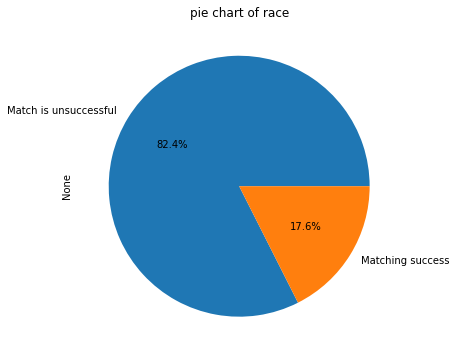

In [78]:
# Then what if the date has the same race?
series = analisis_df[(analisis_df.samerace==1)].groupby('match').size()
series.index = series.index.map({0:'Match is unsuccessful', 1:'Matching success'})
print(series)
series.plot('pie', autopct='%1.1f%%', figsize=(8,6), title='pie chart of race')

We can conclue from the above two pie charts that people with same races will more likely to match.

#### Correlation analysis

Text(0.5, 1.0, 'Correlation between interests')

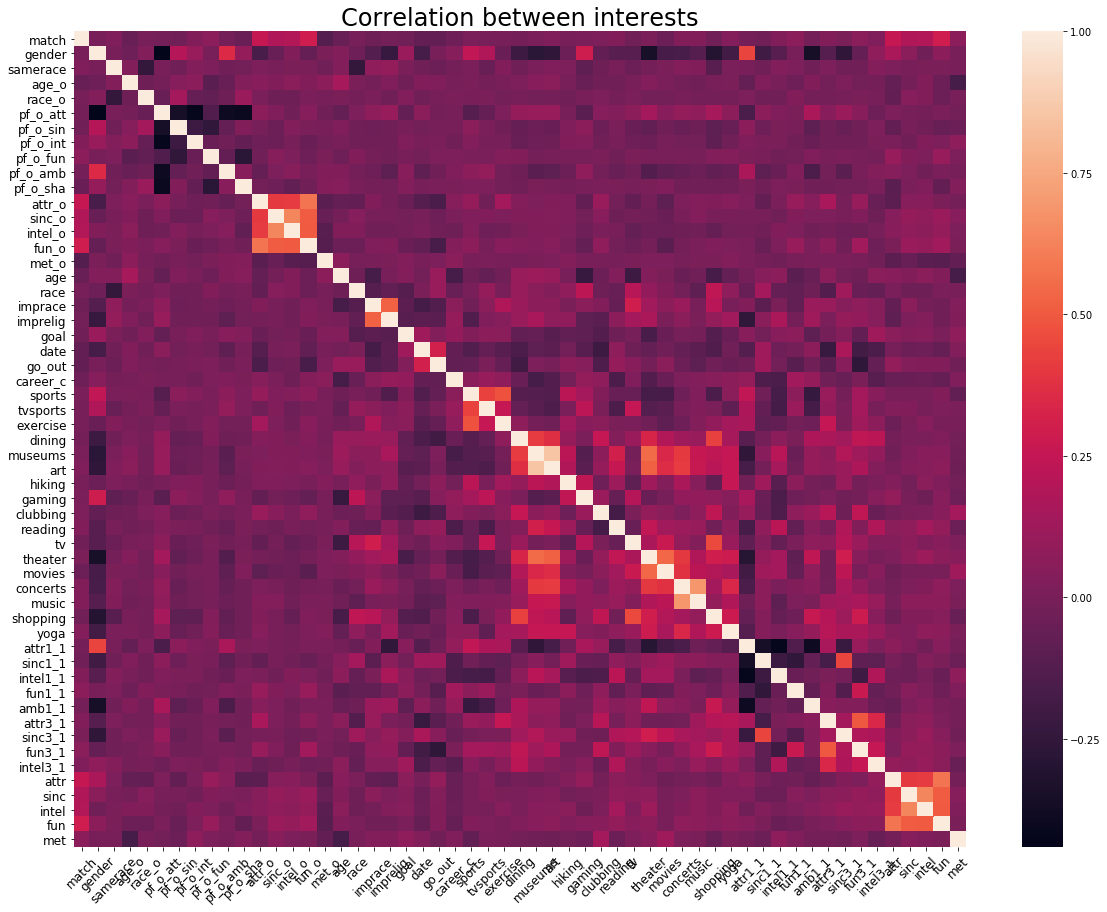

In [80]:
cols = ['match', 'gender', 'samerace', 'age_o', 'race_o', 'pf_o_att',
       'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'met_o', 'age', 'race',
       'imprace', 'imprelig',  'goal', 'date', 'go_out',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'attr1_1', 'sinc1_1',
       'intel1_1', 'fun1_1', 'amb1_1', 'attr3_1', 'sinc3_1', 'fun3_1',
       'intel3_1', 'attr', 'sinc', 'intel', 'fun', 'met']

interests_col = ['match', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga']

plt.figure(figsize=(20, 15))
corr_df = train_ml_df[cols].corr()
ax = sns.heatmap(corr_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.set_title('Correlation between interests', fontsize=24)

The lighter the color, the more relevant the two features are.

#### Dealing with missing values and outliers

In [61]:
# pf_o_att：partner's stated preference at Time 1 (attr1_1) for Attractive（0-100)
# attr1_1: participant's peference towards a partner（0-100）

# attr_o: rating by partner the night of the event, for Attractiveness（1-10）  
# attr3_1: participant's rating for him/herself, for Attractiveness（1-10）

In [81]:
# check the differences in features for the trian and test datasets
print(set(train_ml_df.columns) ^ set(test_ml_df.columns))

# Count the missing values for each feature and calculate the ratio
t_df = train_ml_df.isnull().sum().reset_index(name='miss_cnt')
t_df = t_df[(t_df['miss_cnt']>0)]
t_df['miss_ratio'] = t_df['miss_cnt']/train_ml_df.shape[0]
t_df

{'shar1_1'}


,index,miss_cnt,miss_ratio
3,age_o,67,0.017595
4,race_o,58,0.015231
5,pf_o_att,58,0.015231
6,pf_o_sin,58,0.015231
7,pf_o_int,58,0.015231
8,pf_o_fun,67,0.017595
9,pf_o_amb,76,0.019958
10,pf_o_sha,76,0.019958
11,attr_o,97,0.025473
12,sinc_o,138,0.036239


The test dataset doesn't have the shar1_1 feature. Most of the ratios for missing values are around 1%, which is a fine rate.

Filling/dropping the missing data: I use four different methods to fill or drop the missing data.

For shar1_1, I choose to drop it because it's not included in the test database.
<br />For features related to pid and iid, I calculate the mean of the existing data and fill the missing data.
<br />For discrete variables including from, goal, date, career, career_c, I fill the missing data with the mode of the existing data in each feature.
<br />For field, I fill the missing data with 18, because 18 is "Other" according to the SpeedDatingDataKey doc. For race, race_o, I filling the missing data with 6 for the same reason.

In [82]:
def fill_miss_data(data_df):
    if 'shar1_1' in data_df.columns:
        data_df.drop(['shar1_1'], axis=1, inplace=True)

    for col in ['age_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'met_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr', 'sinc', 'intel', 'fun', 'met']:
        t_df = data_df.groupby(['pid'])[col].mean().reset_index(name='t_'+col)
        data_df = pd.merge(data_df, t_df, on=['pid'])
        data_df[col] = data_df.apply(lambda df:df['t_'+col] if np.isnan(df[col]) else df[col], axis=1)
        data_df[col] = data_df[col].fillna(data_df[col].mean()).astype(int)
        data_df.drop(['t_'+col], axis=1, inplace=True)

    for col in [ 'age', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'imprace', 'imprelig','sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking',
           'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts',
           'music', 'shopping', 'yoga', 'date', 'go_out']:
        t_df = data_df.groupby(['iid'])[col].mean().reset_index(name='t_'+col)
        data_df = pd.merge(data_df, t_df, on=['iid'])
        data_df[col] = data_df.apply(lambda df:df['t_'+col] if np.isnan(df[col]) else df[col], axis=1)
        data_df[col] = data_df[col].fillna(data_df[col].mean()).astype(int)
        data_df.drop(['t_'+col], axis=1, inplace=True)

    for col in ['from', 'goal', 'date', 'career', 'career_c']: 
        data_df[col].fillna(data_df[col].mode()[0], inplace=True)

    data_df['field'].fillna(18, inplace=True)
    data_df['race'].fillna(6, inplace=True)
    data_df['race_o'].fillna(6, inplace=True)
    return data_df

# train_ml_df = fill_miss_data(train_ml_df)
train_ml_df = train_ml_df.dropna()
test_ml_df = fill_miss_data(test_ml_df)

#### Feature selection

I use 3 different methods to find out important features.

First I will remove features with low variance in order to decrease the useless dimensions for modelling. Then I use the chi-square test and ANOVA to rank importance of the features. The third method is using Random Forest to rank the important features.

In [84]:
from sklearn.feature_selection.variance_threshold import VarianceThreshold
from sklearn.feature_selection.univariate_selection import SelectPercentile

feature_cols = ['gender', 'samerace', 'age_o', 'race_o', 'pf_o_att',
       'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'met_o', 'age', 'race',
       'imprace', 'imprelig',  'goal', 'date', 'go_out',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'attr1_1', 'sinc1_1',
       'intel1_1', 'fun1_1', 'amb1_1', 'attr3_1', 'sinc3_1', 'fun3_1',
       'intel3_1', 'attr', 'sinc', 'intel', 'fun', 'met']

# removing features with low variance
one_hot_cols = []
for col in feature_cols:
    if train_ml_df[col].unique().shape[0]<=10:
        one_hot_cols.append(col)
selector = VarianceThreshold(threshold=0.8*(1-0.8))
selector.fit(train_ml_df[one_hot_cols])
print('to delete:',np.array(one_hot_cols)[selector.get_support()==False])
print('met_o  count\n', train_ml_df['met_o'].value_counts())
one_hot_cols = list(np.array(one_hot_cols)[selector.get_support()])


to delete: ['met_o']
met_o  count
 2.0    3064
1.0     111
3.0       1
Name: met_o, dtype: int64


We can see that most values in the met_o feature is 2.0, which makes the variance low. 

In [22]:
def select_feature(data_df, feature_cols, k, mode=''):
    '''
    mode: f_classif, or chi2
    '''
    from sklearn.feature_selection import SelectKBest, f_classif, chi2
    if mode=='f_classif':
        selector=SelectKBest(score_func=f_classif, k=k)
    else:
        selector=SelectKBest(score_func=chi2, k=k)
    selector.fit(data_df[feature_cols], data_df['match'])
    t_df = pd.DataFrame({'feature_cols':feature_cols, 'score':selector.scores_, 'pvalue':selector.pvalues_})
    t_df = t_df.sort_values(by=['score'], ascending=False)
    return t_df

# sklearn.feature_selection.chi2
# sklearn.feature_selection.f_classif
t_df = select_feature(train_ml_df, feature_cols, k=10, mode='chi2')
t_df

,feature_cols,score,pvalue
13,fun_o,169.224213,1.092970e-38
52,fun,168.767334,1.375304e-38
10,attr_o,132.855685,9.722882e-31
49,attr,132.666584,1.069455e-30
50,sinc,49.639709,1.847366e-12
11,sinc_o,49.614118,1.871620e-12
43,fun1_1,38.681489,4.989184e-10
7,pf_o_fun,37.565188,8.840832e-10
9,pf_o_sha,36.847316,1.277519e-09
12,intel_o,35.338146,2.771502e-09


In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

def get_feature_importance(model, feature_cols):
    importances = model.feature_importances_
    t_df = pd.DataFrame({'feature_cols':feature_cols, 'score':importances})
    t_df = t_df.sort_values(by=['score'],ascending=False)
    return t_df

# Use Random Forests to find important features
model = RandomForestClassifier(random_state=0)
model.fit(train_ml_df[feature_cols], train_ml_df['match'])
print(len(feature_cols))

t_df =get_feature_importance(model, feature_cols)
t_df

54


,feature_cols,score
13,fun_o,0.057537
10,attr_o,0.056009
52,fun,0.054901
49,attr,0.049988
50,sinc,0.034056
11,sinc_o,0.033669
2,age_o,0.029425
9,pf_o_sha,0.029042
7,pf_o_fun,0.027193
4,pf_o_att,0.025645


The above two features give very similar results. We can tell that the personality of a person plays an important role in the speed-dating events. Features like fun, attraction, sincere are most important in deciding if two people could match or not.

### Part 2: Predicting Matches [35 Points]

I test Logistic Regression, Random Forests, SVM, Multi-layer perception, XGBoost to pick out the best model. I use stratified sampling in 3-fold for cross-validation to generate training/validation/test splits from the dataset. I tuned the model hyperparameters with grid search.

In [24]:
from sklearn.model_selection._search import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import lightgbm as lgb
import xgboost as xgb

In [25]:
# Since the number of unsuccessful matches is much larger than the successful one, I tune the y_pred to be 0.22 in order to get more even data
def my_f1_scorer(clf, X, y_true):
    y_pred_prob = clf.predict_proba(X)
    y_pred = np.array([0]*len(y_pred_prob))
    y_pred[y_pred_prob[:,1]>0.22] = 1
    f1 = metrics.f1_score(y_true, y_pred)
    return f1

# Using grid search tune the model hyperparameters for cross-validation
def grid_search(model, param_grid, X, y, scoring, cv=5, n_jobs=1, verbose=True):
    grid = GridSearchCV(model, param_grid=param_grid, cv=cv, n_jobs=n_jobs, scoring=scoring, )
    grid.fit(X, y)
    best_model = grid.best_estimator_
    print(best_model)
    grid_df = pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'std_test_score']].loc[grid.best_index_]
    if verbose:
        print('cv params:', grid.cv_results_['params'][grid.best_index_])
        print('cv score:', grid.cv_results_['mean_test_score'][grid.best_index_])
    return best_model, grid_df

In [26]:
train_ml_df = pd.read_csv('../data/trainML.csv')
test_ml_df = pd.read_csv('../data/testML.csv')
submit_df = pd.read_csv('../data/testML.csv')

In [27]:
train_ml_df['match'].value_counts()

0    3180
1     628
Name: match, dtype: int64

In [28]:
# train_ml_df = fill_miss_data(train_ml_df)
train_ml_df = train_ml_df.dropna()
test_ml_df = fill_miss_data(test_ml_df)
train_ml_df['is_train'] = True
test_ml_df['is_train'] = False
all_data_df = pd.concat([train_ml_df, test_ml_df], axis=0).reset_index(drop=True)

feature_cols = ['gender', 'samerace', 'age_o', 'race_o', 'pf_o_att',
       'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'age', 'race',
       'imprace', 'imprelig', 'date', 'go_out',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'attr1_1', 'sinc1_1',
       'intel1_1', 'fun1_1', 'amb1_1', 'attr3_1', 'sinc3_1', 'fun3_1',
       'intel3_1', 'attr', 'sinc', 'intel', 'fun', 'met']

partner_cols = [ 'field', 'imprace', 'imprelig', 'goal',
       'date', 'go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga']

field_dict = {'Law': 1, 'Math': 2, 'Soc. Sc.': 3, 'Med. Sc.': 4, 'Eng.': 5, 'Journ.': 6, 'Hist.': 7, 'Econ': 8, 'Educ.': 9, 'Nat. Sc.': 10, 'Soc. Wr.': 11, 'Und.': 12, 'Pol. Sc.': 13, 'Film': 14, 'Arts': 15, 'Lang.': 16, 'Arch.': 17, 'Oth.': 18}
all_data_df['field'] = all_data_df['field'].map(field_dict)

t_df = all_data_df[['iid', 'pid']+ partner_cols].copy()
t_df.rename(columns={'iid' : 'pid', 'pid': 'iid'}, inplace=True) 
partner_cols = {col : col+'_partner' for col in partner_cols}
t_df.rename(columns=partner_cols , inplace=True)
all_data_df = pd.merge(all_data_df, t_df, on=['iid', 'pid'])
feature_cols += partner_cols

# Add the age difference feature
all_data_df['age_diff'] = all_data_df.apply(lambda df:df['age']-df['age_o'], axis=1)

# Add the feature of whether the date has the same field
all_data_df['is_same_field'] = 0
all_data_df.loc[all_data_df.field == all_data_df.field_partner, 'is_same_field'] = 1
all_data_df.drop(['field', 'field_partner'], axis=1, inplace=True)

# Add the feature of whether the date has the same goal
all_data_df['is_same_goal'] = 0
all_data_df.loc[all_data_df.goal == all_data_df.goal_partner, 'is_same_goal'] = 1
all_data_df.drop(['goal', 'goal_partner'], axis=1, inplace=True)

feature_cols.remove('field')
feature_cols.remove('goal')
feature_cols += ['age_diff', 'is_same_field', 'is_same_goal']

train_ml_df = all_data_df[(all_data_df['is_train'])]
test_ml_df = all_data_df[(all_data_df['is_train']==False)]
del all_data_df

In [29]:
# feature_cols = ['fun_o', 'attr', 'attr_o', 'fun', 'intel', 'age_o', 'concerts', 'intel_o', 'age', 'pf_o_amb', 'pf_o_sha', 'imprace', 'movies', 'gaming', 'intel3_1', 'sinc', 'pf_o_att', 'date', 'amb1_1', 'pf_o_sin', 'dining', 'is_same_field', 'hiking', 'attr1_1', 'race', 'sinc1_1', 'go_out', 'theater', 'music', 'fun1_1']

In [30]:
X, y = train_ml_df[feature_cols].values, train_ml_df['match'].values.ravel()

In [31]:
# Logistic Regression
%%time

model = LogisticRegression(solver='lbfgs')
params = {'C':[1e-4,1e-3,1e-2,0.1,1]}
# lr_best_model, grid_df = grid_search(model, params, X, y, scoring='f1' , cv=3)
lr_best_model, grid_df = grid_search(model, params, X, y, scoring=my_f1_scorer , cv=3)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
cv params: {'C': 0.01}
cv score: 0.46186394769844985
Wall time: 489 ms


In [32]:
# Random Forests
%%time

model = RandomForestClassifier()
params = { 'n_estimators': [10, 20, 40, 60, 100, 200, 300],
    'criterion': ["gini", "entropy"],
    'min_samples_leaf': [1, 10, 20, 30],}
rf_best_model, grid_df = grid_search(model, params, X, y, scoring=my_f1_scorer, cv=3 )


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
cv params: {'criterion': 'entropy', 'min_samples_leaf': 30, 'n_estimators': 300}
cv score: 0.5073802498702105
Wall time: 44.7 s


In [33]:
# SVM
%%time

model = SVC(probability=True)
params = {'C':[0.1,1,10,100,],
      'gamma':[1e-3,1e-2,0.1]}

svc_best_model, grid_df = grid_search(model, params, X, y, scoring=my_f1_scorer, cv=3 )


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
cv params: {'C': 1, 'gamma': 0.001}
cv score: 0.3949796529033464
Wall time: 1min 15s


In [34]:
# Multi-layer perception
%%time
params = {'solver':['lbfgs', 'sgd'],
          'alpha':[1e-5, 1e-4, 1e-3], 
          'hidden_layer_sizes':[(32, 16), (16, 4)]
          }
model = MLPClassifier(hidden_layer_sizes=[1],activation='logistic',solver ='sgd',random_state=3)
mlp_best_model, grid_df = grid_search(model, params, X, y, scoring=my_f1_scorer, cv=3 )


MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=3, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
cv params: {'alpha': 1e-05, 'hidden_layer_sizes': (16, 4), 'solver': 'lbfgs'}
cv score: 0.44203320697885307
Wall time: 9.25 s


In [35]:
# XGBoost
%%time
params = {
              'learning_rate': [0.01,  0.05, 0.1],
              'n_estimators': [20, 60,  100, 150, 500],
              'max_depth':[3, 5, 7],
              'subsample': [ 0.8, 0.9, 1],
              'colsample_bytree': [0.8, 0.9, 1],
}
model = xgb.XGBClassifier(objective='binary:logistic',nthread=-1, random_state=0)
xgb_best_model, grid_df = grid_search(model, params, X, y, scoring=my_f1_scorer, cv=3 )


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=20, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)
cv params: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20, 'subsample': 0.8}
cv score: 0.5203998832553912
Wall time: 8min 20s


Since the number of unsuccessful matches is much larger than the successful one, I will use stratified sampling for cross-validation to generate training/validation/test splits from
the dataset

In [36]:
X, y = train_ml_df[feature_cols].values, train_ml_df['match'].values.ravel()
stratified_folder = StratifiedKFold(n_splits=3, random_state=2019, shuffle=False)
f1_score_list = []
for train_index, test_index in stratified_folder.split(X, y):
    model = RandomForestClassifier(random_state=0)
    model = xgb.XGBClassifier(random_state=0, n_estimators=63)
    model = xgb_best_model
    model.fit(X[train_index], y[train_index])
    y_pred_prob = model.predict_proba(X[test_index])
    y_pred = np.array([0]*len(y_pred_prob))
    y_pred[y_pred_prob[:,1]>0.22] = 1
#     y_pred = model.predict(X[test_index])
    print('===================================================')
    print('f1_score: ', metrics.f1_score(y[test_index], y_pred))
    print('AUC: ',metrics.roc_auc_score(y[test_index], y_pred))
    print('accuracy_score: ',metrics.accuracy_score(y[test_index], y_pred))
    f1_score_list.append(metrics.f1_score(y[test_index], y_pred))
print('f1-score mean: {}'.format(np.array(f1_score_list).mean()))

f1_score:  0.5376712328767124
AUC:  0.7911584982523198
accuracy_score:  0.7443181818181818
f1_score:  0.49042145593869724
AUC:  0.7303668871174593
accuracy_score:  0.7481060606060606
f1_score:  0.533106960950764
AUC:  0.7882980863530062
accuracy_score:  0.7395833333333334
f1-score mean: 0.5203998832553912


The XGB classifier gives the best cv score, so I would choose XGBoost as my model.

In [37]:
y_pred_prob = xgb_best_model.predict_proba(test_ml_df[feature_cols].values)
y_pred = np.array([0]*len(y_pred_prob))
y_pred[y_pred_prob[:,1]>0.22] = 1
submit_df['match'] = y_pred
submit_df.to_csv('../data/testML.csv', index=None)

### Part 3: Build recommendation Engine [50 Points]

For this part, I test SVD, SVD++, NMF, and KNN to find the best model for recommendation Engine. I seperate the process into first not using grid search and then using grid search to make sure the model could be tuned to provide the best result.

In [38]:
from surprise import SVD, SVDpp, NMF, KNNBaseline, NormalPredictor, BaselineOnly
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split, KFold, GridSearchCV, cross_validate

In [39]:
train_rec_df = pd.read_csv('../data/trainRec.csv')
test_rec_df = pd.read_csv('../data/testRec.csv')
submit_df = pd.read_csv('../data/testRec.csv')

# Taking only the pid, iid, rate reatures
train_rec_df.rename(columns={'pid':'userID', 'iid':'itemID', 'rate':'rating'}, inplace=True)
test_rec_df.rename(columns={'pid':'userID', 'iid':'itemID', 'rate':'rating'}, inplace=True)

In [40]:
train_rec_df.head()

,userID,itemID,rating
0,234,235,7.25
1,234,237,7.40
2,234,238,6.85
3,234,240,7.10
4,234,241,8.35


In [41]:
test_rec_df.head()

,userID,itemID,rating
0,234,234,7.382272
1,234,236,7.402233
2,234,239,6.470492
3,234,243,6.309962
4,234,244,6.934749


In [43]:
# Use pandas dataframe to create the dataset

reader = Reader(rating_scale=(train_rec_df.rating.min(), train_rec_df.rating.max()))
train_data = Dataset.load_from_df(train_rec_df[['userID', 'itemID', 'rating']], reader)

reader = Reader(rating_scale=(test_rec_df.rating.min(), test_rec_df.rating.max()))
test_data = Dataset.load_from_df(test_rec_df[['userID', 'itemID', 'rating']], reader)


In [44]:
# SVD
%%time

# Not using grid search
svd_model = SVD()
res = cross_validate(svd_model, train_data, measures=['MAE'], cv=3,  verbose=True, n_jobs=-1)
print('MAE (testset) mean: {}'.format(res['test_mae'].mean()))
print('=================================================')

# Using grid search to tune the model
param_grid = {'n_epochs': [50, 70, 150], 
              'lr_all': [0.07, 0.09],
              'reg_all': [0.01, 0.002]
             }
gs = GridSearchCV(SVD, param_grid, measures=['MAE'], cv=5)
gs.fit(train_data)
print('best mae:',gs.best_score['mae'])
print('best params:', gs.best_params['mae'])
svd_model = gs.best_estimator['mae']
res = cross_validate(svd_model, train_data, measures=['MAE'], cv=3,  verbose=True, n_jobs=-1)
print('best MAE (testset) mean: {}'.format(res['test_mae'].mean()))

Evaluating MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
MAE (testset)     0.1630  0.1552  0.1627  0.1603  0.0036  
Fit time          1.18    1.19    1.17    1.18    0.01    
Test time         0.06    0.06    0.06    0.06    0.00    
MAE (testset) mean: 0.16029508973548065
best mae: 0.004445486725334401
best params: {'n_epochs': 150, 'lr_all': 0.09, 'reg_all': 0.002}
Evaluating MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
MAE (testset)     0.0061  0.0060  0.0066  0.0063  0.0003  
Fit time          9.03    8.66    8.65    8.78    0.18    
Test time         0.06    0.05    0.06    0.06    0.00    
best MAE (testset) mean: 0.006267907333096129
Wall time: 6min 43s


In [45]:
# SVD++
%%time
# param_grid = {'n_epochs': [50, 70, 150], 
#               'lr_all': [0.07, 0.09],
#               'reg_all': [0.01, 0.002]
#              }
# gs = GridSearchCV(SVDpp, param_grid, measures=['MAE'], cv=5)
# gs.fit(train_data)
# print('best mae:',gs.best_score['mae'])
# print('best params:', gs.best_params['mae'])
# svdpp_model = gs.best_estimator['mae']
svdpp_model = SVDpp(n_epochs=70, lr_all=0.07, reg_all=0.002)
res = cross_validate(svdpp_model, train_data, measures=['MAE'], cv=3, verbose=True, n_jobs=-1)
print('best MAE (testset) mean: {}'.format(res['test_mae'].mean()))

Evaluating MAE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
MAE (testset)     0.0071  0.0076  0.0076  0.0074  0.0002  
Fit time          87.88   88.19   87.21   87.76   0.41    
Test time         0.88    0.86    0.86    0.87    0.01    
best MAE (testset) mean: 0.007445099344487685
Wall time: 1min 30s


In [48]:
# NMF
%%time

# Not using grid search
nmf_model = NMF()
res = cross_validate(nmf_model, train_data, measures=['MAE'], cv=3,  verbose=True, n_jobs=-1)
print('best MAE (testset) mean: {}'.format(res['test_mae'].mean()))
print('=================================================')

# Using grid search to tune the model
param_grid = {'n_epochs': [50, 70, 100], 
              'n_factors':[15, 30, 50],
              'biased': [True, False],
             }
gs = GridSearchCV(NMF, param_grid, measures=['MAE'], cv=5)
gs.fit(train_data)
print('best mae:',gs.best_score['mae'])
print('best params:', gs.best_params['mae'])
nmf_model = gs.best_estimator['mae']
res = cross_validate(nmf_model, train_data, measures=['MAE'], cv=3, verbose=True, n_jobs=-1)
print('best MAE (testset) mean: {}'.format(res['test_mae'].mean()))

Evaluating MAE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
MAE (testset)     0.9905  0.9579  0.9773  0.9752  0.0134  
Fit time          1.10    1.11    1.11    1.11    0.00    
Test time         0.04    0.04    0.05    0.04    0.00    
best MAE (testset) mean: 0.9752212336134409
best mae: 0.1438125502171391
best params: {'n_epochs': 100, 'n_factors': 30, 'biased': True}
Evaluating MAE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
MAE (testset)     0.1416  0.1433  0.1471  0.1440  0.0023  
Fit time          3.61    3.69    3.54    3.61    0.06    
Test time         0.07    0.06    0.06    0.06    0.00    
best MAE (testset) mean: 0.144000304045088
Wall time: 4min 36s


In [49]:
# KNN
%%time

# Not using grid search
knn_model = KNNBaseline()
res = cross_validate(knn_model, train_data, measures=['MAE'], cv=3,  verbose=True, n_jobs=-1)
print('best MAE (testset) mean: {}'.format(res['test_mae'].mean()))
print('=================================================')

# Using grid search to tune the model
param_grid = {'k': [30, 40, 50, 70, 100], 
             }
gs = GridSearchCV(KNNBaseline, param_grid, measures=['MAE'], cv=5)
gs.fit(train_data)
print('best mae:',gs.best_score['mae'])
print('best params:', gs.best_params['mae'])
knn_model = gs.best_estimator['mae']
res = cross_validate(knn_model, train_data, measures=['MAE'], cv=3, verbose=True, n_jobs=-1)
print('best MAE (testset) mean: {}'.format(res['test_mae'].mean()))

Evaluating MAE of algorithm KNNBaseline on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
MAE (testset)     0.1484  0.1465  0.1462  0.1470  0.0010  
Fit time          0.13    0.15    0.16    0.15    0.01    
Test time         1.97    1.90    1.87    1.91    0.04    
best MAE (testset) mean: 0.14703463474447384
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computin

Since the SVD gives the lowest MAE, I will choose it as my model for recommendation engine.

In [50]:
%%time

# Pridiction results
trainset = train_data.build_full_trainset()
testset = test_data.build_full_trainset().build_testset()

# Choosing SVD
model = svd_model
model.fit(trainset)
predictions = model.test(testset)
pred = [p.est for p in predictions]
submit_df['rate'] = pred
submit_df.to_csv('../data/testRec.csv', index=None)

Wall time: 13.5 s
